# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Thresholding, Binarization & Adaptive Thresholding </h2>

<h5 style="margin-top:5px;">In this lesson, we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ Binarized Images <br>
2️⃣ Thresholding Methods <br>
3️⃣ Adaptive Thresholding <br>
4️⃣ SkImage's Threshold Local <br>
</p>

In [1]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Thresholding Methods** ###

In [5]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

'wget' is not recognized as an internal or external command,
operable program or batch file.


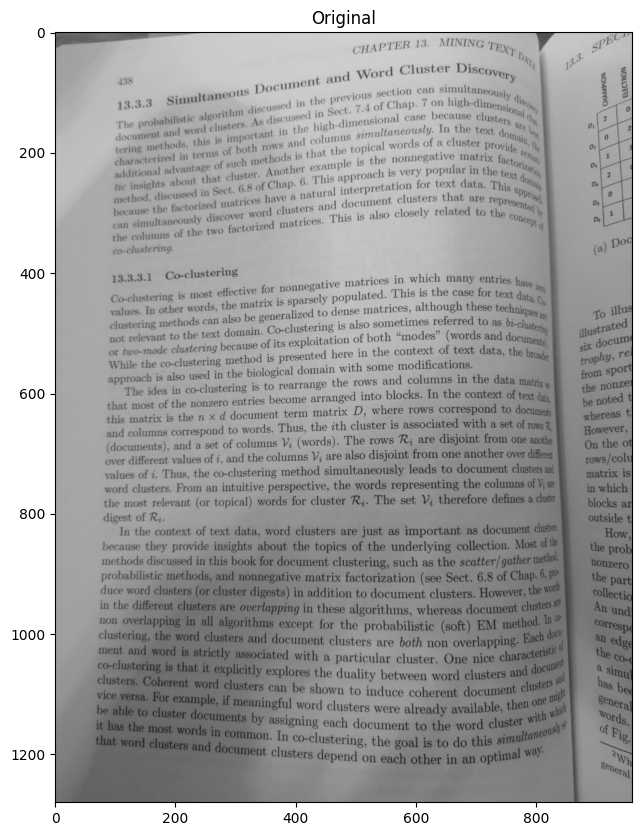

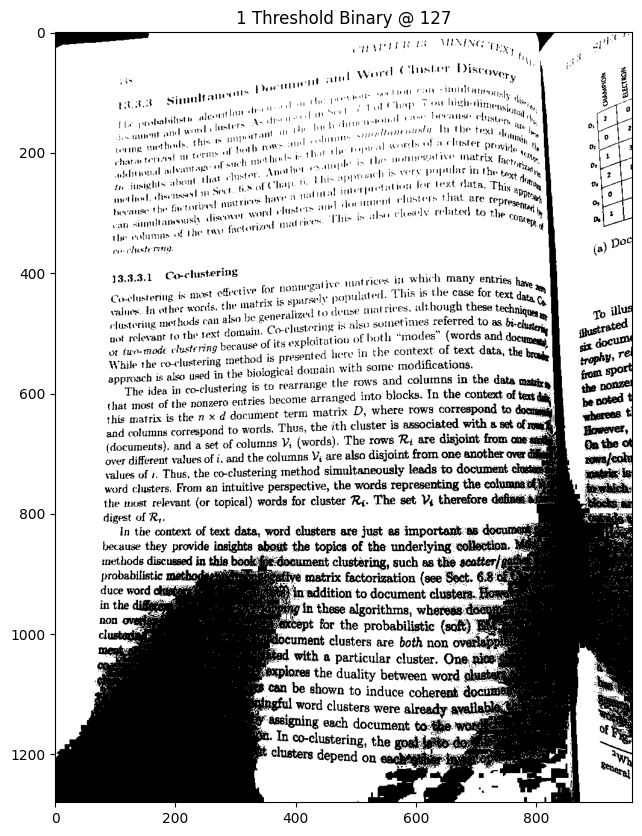

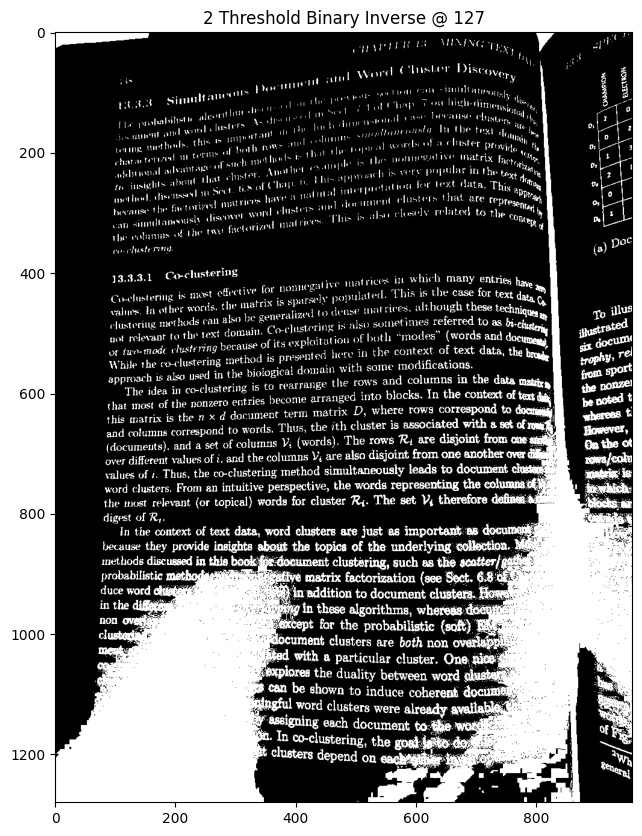

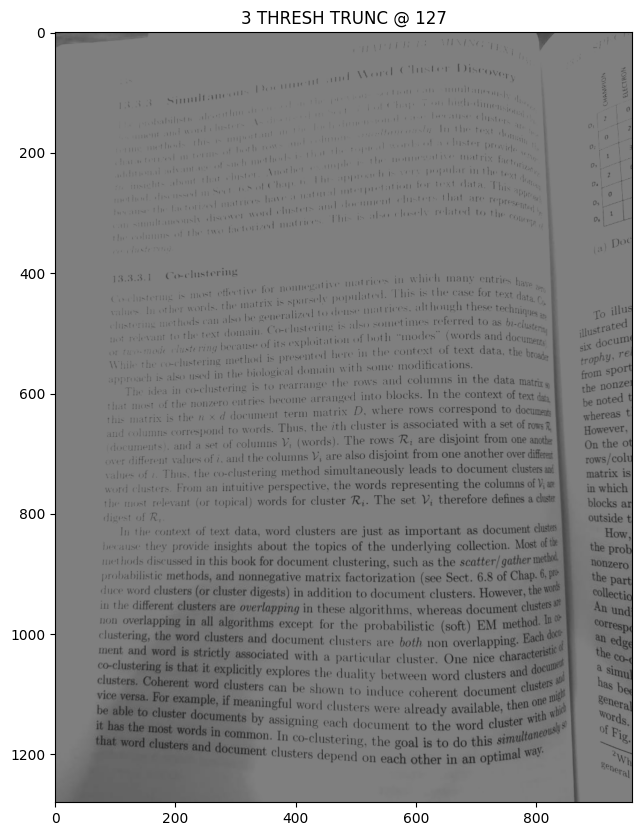

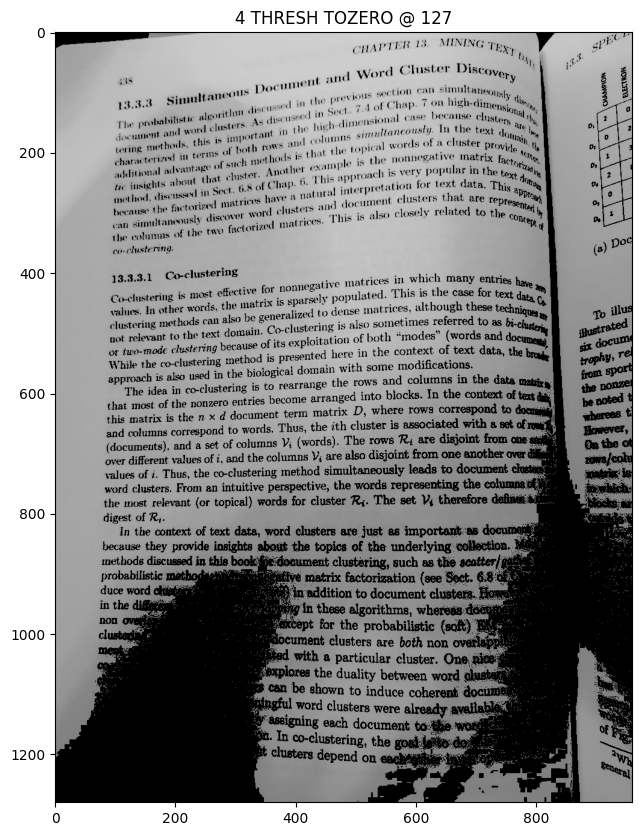

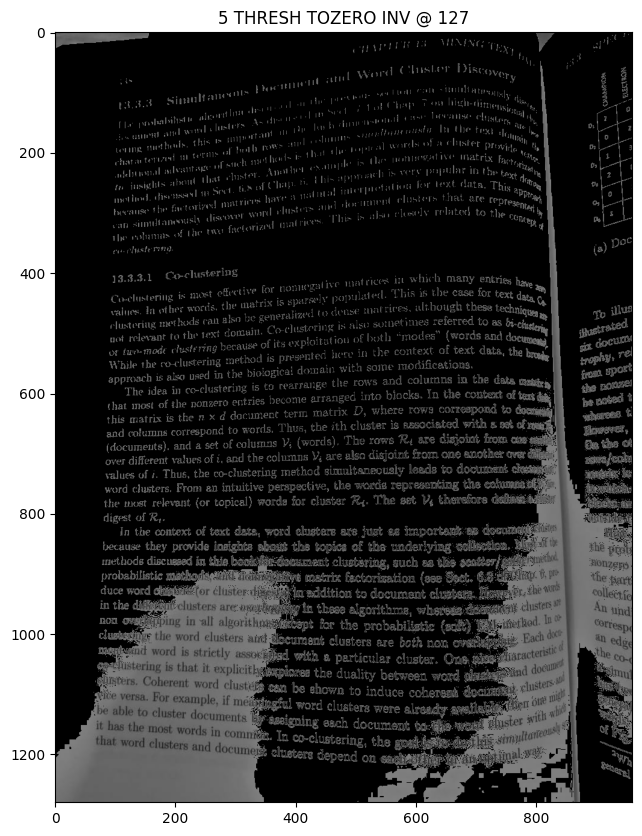

In [8]:
# Load our image as grayscale
image = cv2.imread('images/scan.jpeg', 0)
imshow("Original", image)

# Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

# Values below 127 goes to 255 and values above 127 go to 0 (reverse of above)
ret, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary Inverse @ 127', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('3 THRESH TRUNC @ 127', thresh3)

# Values below 127 go to 0, above 127 are unchanged
ret, thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 THRESH TOZERO @ 127', thresh4)

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret, thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 THRESH TOZERO INV @ 127', thresh5)

### **Adaptive Threholding** ###
#### 1. ADAPTIVE_THRESH_MEAN_C ####
#### 2. THRESH_OTSU ####
#### **cv2.adaptiveThreshold Parameters** ####
#### cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst ####

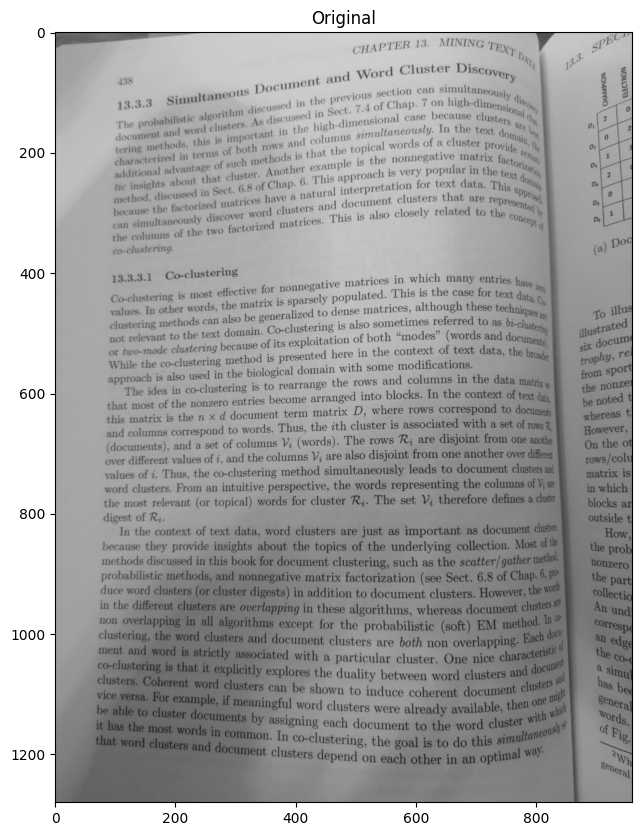

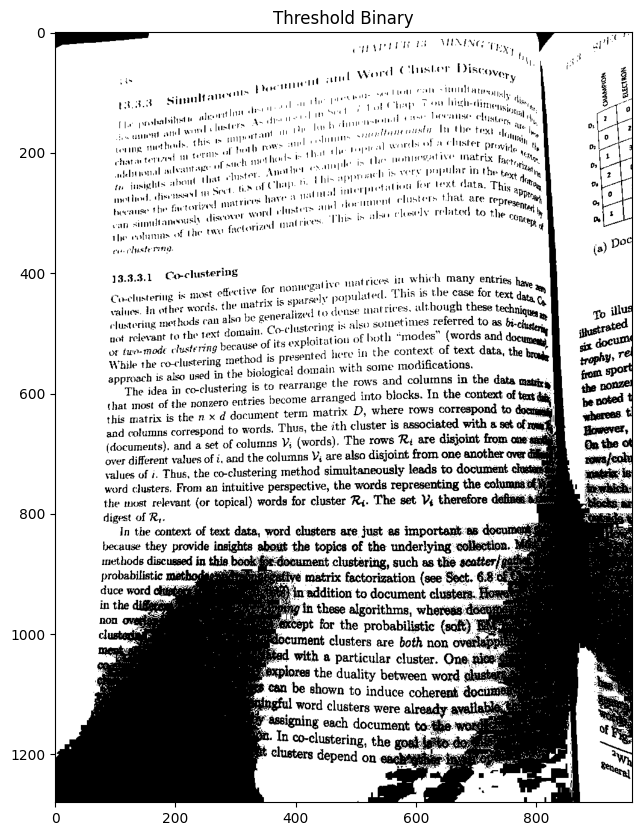

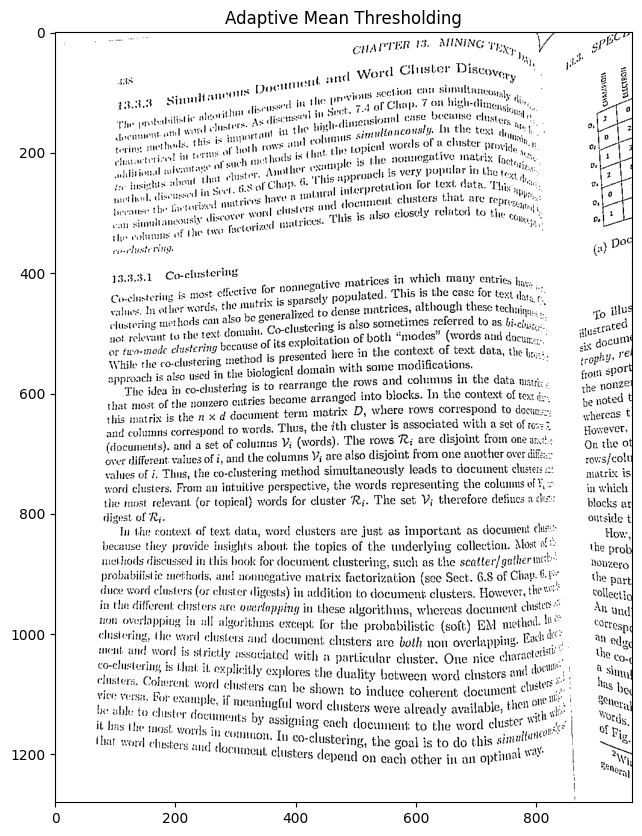

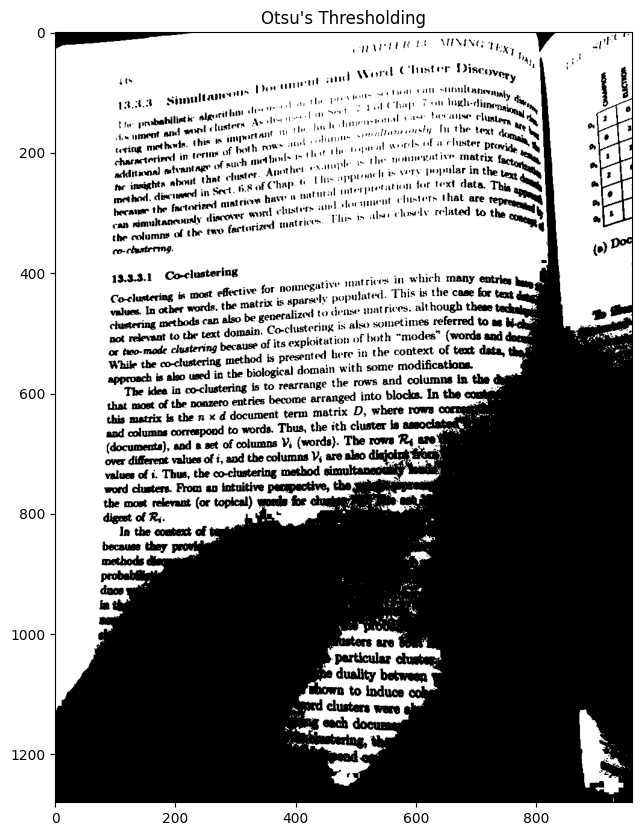

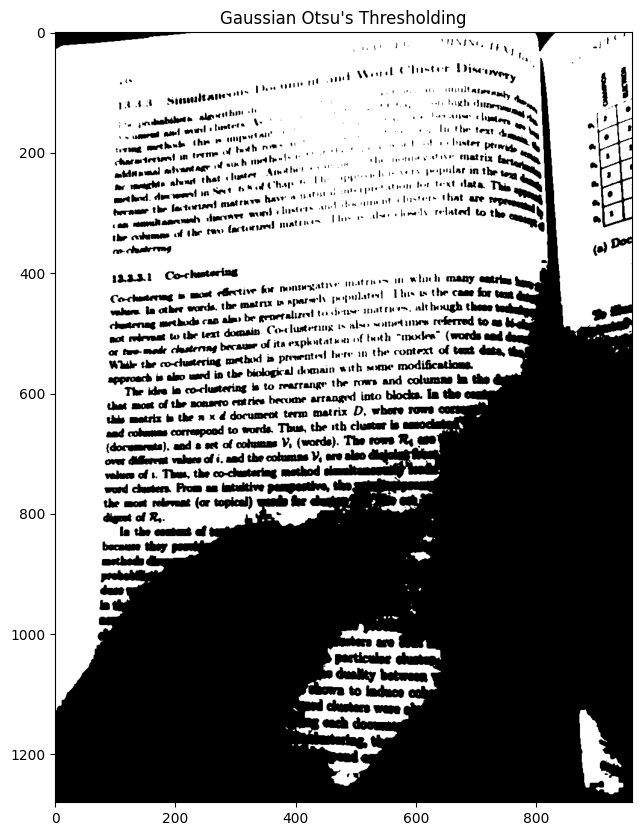

In [10]:
image = cv2.imread("images/scan.jpeg", 0)
imshow("Original", image)

# Values below 127 goes to 0 (black), everything above goes to 255 (white)
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# It's good practice to blur imags as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
imshow("Adaptive Mean Thresholding", thresh)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Gaussian Otsu's Thresholding", th3)

### **SkImage Threshold Local** ###
#### threshold_local(image, block_size, offset=10) ###

In [14]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------------------------------- -------- 10.0/12.8 MB 51.6 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 47.1 MB/s  0:00:00

   ---------------------------------------- 0/4 [tifffile]
   -------------------- ------------------- 2/4 [imageio]
   -------------------- ------------------- 2/4 [imageio]
   ------------------------------ --------- 3/4 [scikit-image]
   ------------------------------ --------- 3/4 [scikit-image]
   ------------------------------ --------- 3/4 [scikit-image]
   ------------------------------ --------- 3/4 [scikit-image]
   ------------------------------ --------- 3/4 [scikit-image]
   ------------------------------ --------- 3/4 [scikit-image]
   ------------------------------ --------- 3/4 [scikit-image]
   ------------------------------ --------- 3/4 [scikit-image]
   ------------------------------ --------- 3/4 [scikit-image]
   -----------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Robin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


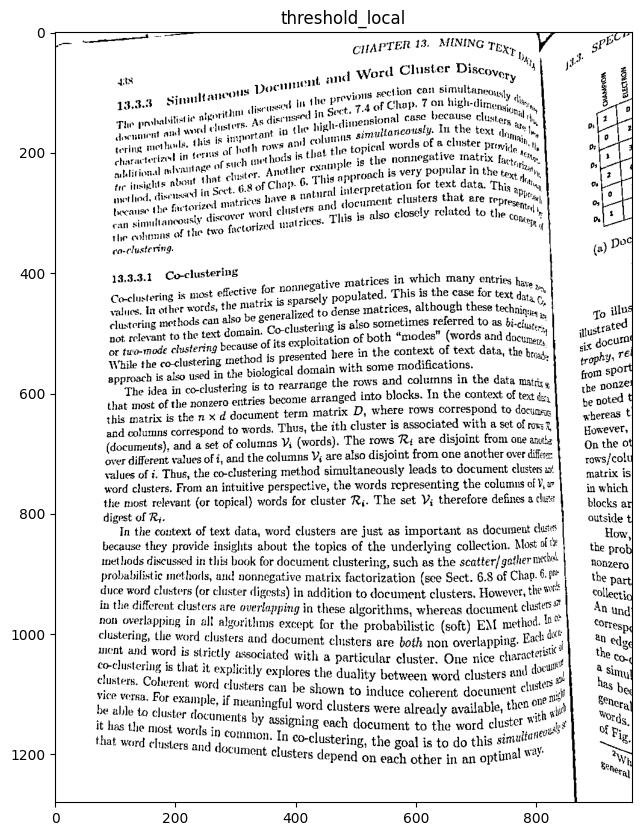

In [16]:
from skimage.filters import threshold_local

image = cv2.imread("images/scan.jpeg")

# We get the Value component from the HSV colour space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)